# Exploring the BioImage Archive
In this notebook we use the [bia-explorer](https://github.com/BioImage-Archive/bia-explorer) project to explore the [S-BIAD634 dataset](https://www.ebi.ac.uk/bioimage-archive/galleries/S-BIAD634-ai.html)  in the [Bio-image Archive](https://www.ebi.ac.uk/bioimage-archive). We will download some images and store them in a local directory.

In [1]:
from bia_explorer import io, biostudies
from skimage.io import imread, imsave
from IPython.display import display, Markdown
import stackview

## Accessing meta-data
First we access the meta data of the dataets. Here we can for example see what the data can be used for and under which license it can be used.

In [2]:
accession = 'S-BIAD634'
submission = biostudies.load_submission(accession)

for a in submission.section.attributes:
    name = a.name
    short_value = str(a.value)
    
    print(f"{name} : {short_value}")

Title : An annotated fluorescence image dataset for training nuclear segmentation methods
Description : This dataset contains annotated fluorescent nuclear images of normal or cancer cells from different tissue origins and sample preparation types, and can be used to train machine-learning based nuclear image segmentation algorithms. It consists of 79 expert-annotated fluorescence images of immuno and DAPI stained samples containing 7813 nuclei in total. In addition, the dataset is heterogenous in aspects such as type of preparation, imaging modality, magnification, signal-to-noise ratio and other technical aspects. Relevant parameters, e.g. diagnosis, magnification, signal-to-noise ratio and modality with respect to the type of preparation are provided in the file list. The images are derived from one Schwann cell stroma-rich tissue (from a ganglioneuroblastoma) cryosection (10 images/2773 nuclei), seven neuroblastoma (NB) patients (19 images/931 nuclei), one Wilms patient (1 image/10

We can also see how many images are in the dataset.

In [3]:
study = io.load_bia_study(accession)

len(study.images)

388

## Visualizing images

A single image can be loaded and shown like this ([See also](https://github.com/BioImage-Archive/bia-explorer/issues/3)).

In [4]:
image = study.images[0]
image

BIAImage(uri='https://www.ebi.ac.uk/biostudies/files/S-BIAD634/dataset\\groundtruth\\Ganglioneuroblastoma_0.tif', size=2239668, fpath=WindowsPath('dataset/groundtruth/Ganglioneuroblastoma_0.tif'))

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
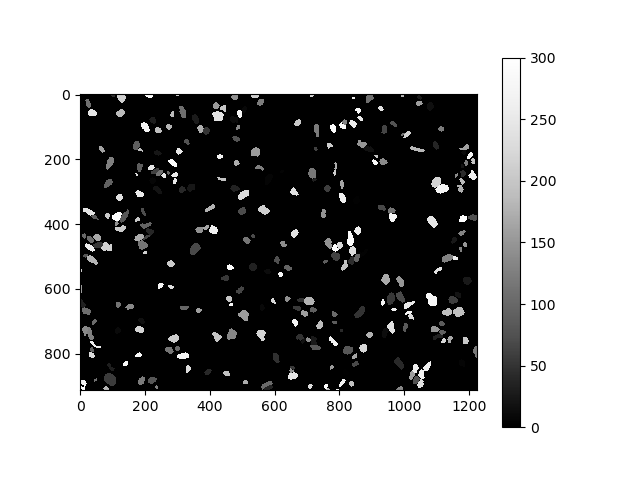
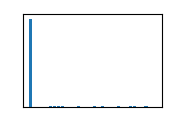

In [5]:
uri = image.uri.replace("\\", "/")
image_data = imread(uri)
stackview.insight(image_data)

To get an idea about the folder structure within the datasets, we can print out paths on the server.

In [6]:
# print out filenames of some images
for image in study.images[:5] + study.images[-5:]:
    print(str(image.fpath))

dataset\groundtruth\Ganglioneuroblastoma_0.tif
dataset\groundtruth\Ganglioneuroblastoma_1.tif
dataset\groundtruth\Ganglioneuroblastoma_10.tif
dataset\groundtruth\Ganglioneuroblastoma_2.tif
dataset\groundtruth\Ganglioneuroblastoma_3.tif
dataset\rawimages\otherspecimen_5.tif
dataset\rawimages\otherspecimen_6.tif
dataset\rawimages\otherspecimen_7.tif
dataset\rawimages\otherspecimen_8.tif
dataset\rawimages\otherspecimen_9.tif


## Downloading data
Before we download selected images, we need to ensure that the folder exists where we want to store the data.

In [7]:
import os

def ensure_folder_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

base_folder = f"../../data/{accession}"
raw_folder = f"../../data/{accession}/images"
groundtruth_folder = f"../../data/{accession}/groundtruth"

ensure_folder_exists(base_folder)
ensure_folder_exists(raw_folder)
ensure_folder_exists(groundtruth_folder)

Next we download all raw images, and ground-truth annotations of all datasets containing "Ganglioneuroblastoma" in their name. We also only download the files in case they are not downloaded yet.

In [8]:
for image in study.images:
    if "Ganglioneuroblastoma" in str(image.fpath):
        uri = image.uri.replace("\\", "/")
        filename = uri.split("/")[-1]
        if "\\rawimages\\" in str(image.fpath):
            target_file = raw_folder + "/" + filename
            if not os.path.exists(target_file):
                image_data = imread(uri)
                imsave(target_file, image_data)
        if "\\groundtruth\\" in str(image.fpath):
            target_file = groundtruth_folder + "/" + filename
            if not os.path.exists(target_file):
                image_data = imread(uri)
                imsave(target_file, image_data)


C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_0.tif is a low contrast image
  imsave(target_file, image_data)
C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_1.tif is a low contrast image
  imsave(target_file, image_data)
C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_10.tif is a low contrast image
  imsave(target_file, image_data)
C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_2.tif is a low contrast image
  imsave(target_file, image_data)
C:\Users\haase\AppData\Local\Temp\ipykernel_26092\2091960599.py:14: UserWarning: ../../data/S-BIAD634/groundtruth/Ganglioneuroblastoma_3.tif is a low contrast image
  imsave(target_file, image_data)
C:\U

We can then check which files arrived.

In [9]:
for f in os.listdir(raw_folder):
    print(f)

Ganglioneuroblastoma_0.tif
Ganglioneuroblastoma_1.tif
Ganglioneuroblastoma_10.tif
Ganglioneuroblastoma_2.tif
Ganglioneuroblastoma_3.tif
Ganglioneuroblastoma_4.tif
Ganglioneuroblastoma_6.tif
Ganglioneuroblastoma_7.tif
Ganglioneuroblastoma_8.tif
Ganglioneuroblastoma_9.tif


In [10]:
for f in os.listdir(groundtruth_folder):
    print(f)

Ganglioneuroblastoma_0.tif
Ganglioneuroblastoma_1.tif
Ganglioneuroblastoma_10.tif
Ganglioneuroblastoma_2.tif
Ganglioneuroblastoma_3.tif
Ganglioneuroblastoma_4.tif
Ganglioneuroblastoma_6.tif
Ganglioneuroblastoma_7.tif
Ganglioneuroblastoma_8.tif
Ganglioneuroblastoma_9.tif


## Exercise
Download all images with "Neuroblastoma" in their name and upload them to a folder in the owncloud. Do not download and upload files which already exist.